In [2]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import pandas as pd

Welcome to JupyROOT 6.30/04


In [3]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [4]:
fAtm = ROOT.TFile.Open('/home/leoperes/atm_hA_BR_4ana_syst_new.root')
fTree_atm = fAtm.Get("ana/Atm")
fTree_atm_All = fAtm.Get("ana/AllEvents")
nSimulatedEvtsReco_atm = fTree_atm.GetEntries()
nSimulatedEvtsAll_atm = fTree_atm_All.GetEntries()

In [5]:
CCNC = GetNpArraysFromTrees(fTree_atm, "CCNC")
CCNC_All = GetNpArraysFromTrees(fTree_atm_All, "CCNC")
MCPartGenMomentum = GetNpArraysFromTrees2(fTree_atm," MCPartGenMomentum")
MCPartGenEndMomentum = GetNpArraysFromTrees2(fTree_atm," MCPartGenEndMomentum")
TotalMomRecoRangeUnitVect = GetNpArraysFromTrees2(fTree_atm,"TotalMomRecoRangeUnitVect")

MCPartGenMomentum_AllSimu = GetNpArraysFromTrees2(fTree_atm_All," MCNuMomentum")

In [6]:
True_mom_In = np.reshape(MCPartGenMomentum, (nSimulatedEvtsReco_atm,4))
True_mom_Out = np.reshape(MCPartGenEndMomentum, (CCNC[CCNC==1].size,4))
Reco_mom_unit = np.reshape(TotalMomRecoRangeUnitVect, (nSimulatedEvtsReco_atm,3))

TrueEnergy_AllEvents = np.reshape(MCPartGenMomentum_AllSimu, (nSimulatedEvtsAll_atm, 4))
TrueEnergy_AllEvents = TrueEnergy_AllEvents[:,3]

In [7]:
print(nSimulatedEvtsReco_atm, nSimulatedEvtsAll_atm)

55047 80000


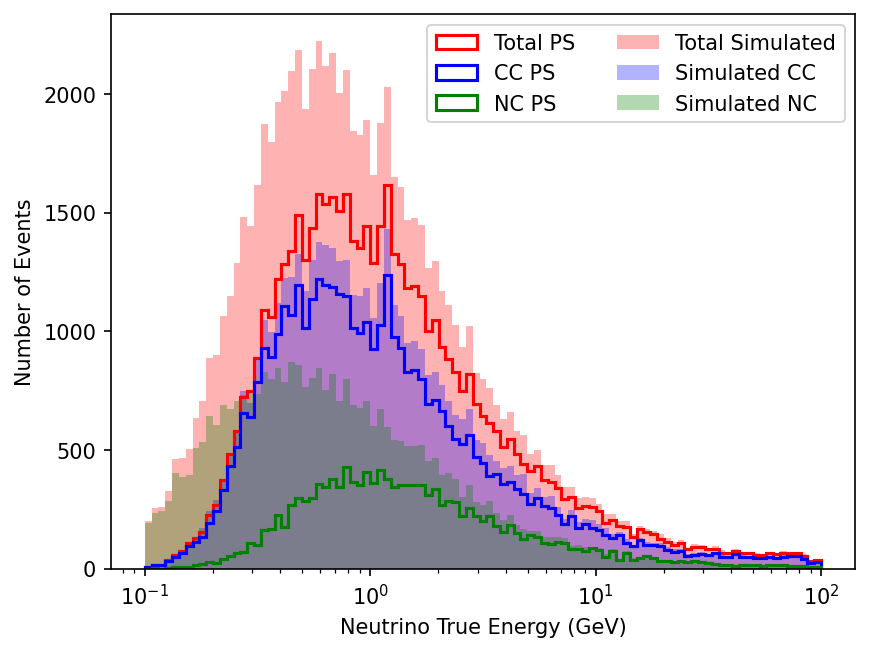

In [8]:
plt.figure(dpi=150)
plt.hist(True_mom_In[:,3],bins =np.logspace(-1,2,100), label=r'Total PS',histtype = 'step', color = 'red', lw=1.5)
plt.hist(True_mom_In[:,3][CCNC==0],bins =np.logspace(-1,2,100), label=r'CC PS',histtype = 'step',color = 'blue', lw=1.5)
plt.hist(True_mom_In[:,3][CCNC==1],bins =np.logspace(-1,2,100), label=r'NC PS',histtype = 'step', color = 'green', lw=1.5)
plt.hist(TrueEnergy_AllEvents,bins =np.logspace(-1,2,100), label=r'Total Simulated',alpha = 0.3, color = 'red')
plt.hist(TrueEnergy_AllEvents[CCNC_All==0],bins =np.logspace(-1,2,100), label=r'Simulated CC',alpha=0.3, color ='blue')
plt.hist(TrueEnergy_AllEvents[CCNC_All==1],bins =np.logspace(-1,2,100), label=r'Simulated NC',alpha=0.3, color='green')
plt.xscale('log')
plt.xlabel('Neutrino True Energy (GeV)')
plt.ylabel('Number of Events')
plt.legend(ncols=2)
plt.show()

In [9]:
Sun_Positions = np.loadtxt('../newSyst/background_sun_pos.dat', delimiter='\t', usecols=(0,1,2))

In [11]:
True_Nu_Direction_Unit = True_mom_In[:, :3]/True_mom_In[:, 3][:, np.newaxis]


In [ ]:
hist_cos = []
for index, atmevt in enumerate(True_Nu_Direction_Unit):
    #if index % 1500 == 0:
    indices = np.random.randint(0, len(Sun_Positions), size=5000)
    # Use the sampled indices to select elements from the array
    sample_sunpos = Sun_Positions[indices]

    for sunpos in sample_sunpos:
        hist_cos.append(np.sum(atmevt*sunpos))

plt.hist(hist_cos, bins = 40,histtype = 'step')
    #plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Sun})$')
plt.show()
        
    

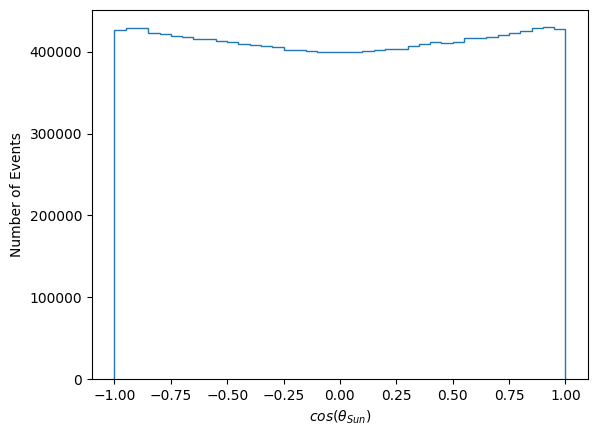

In [21]:
plt.hist(hist_cos, bins = 40,histtype = 'step')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Sun})$')
plt.show()

In [ ]:
hist_cos=[]
for index, atmevt in enumerate(True_Nu_Direction_Unit):
    indices = np.random.randint(0, len(Sun_Positions), size=300)
    # Use the sampled indices to select elements from the array
    sample_sunpos = Sun_Positions[indices]
    hist_cos_tmp = []
    for sunpos in sample_sunpos:
        hist_cos.append(np.sum(atmevt*sunpos))
        hist_cos_tmp.append(np.sum(atmevt*sunpos))
    if index % 1500 == 0:
        plt.hist(hist_cos_tmp, bins = 40,histtype = 'step')
        plt.title(f'index number evt: {index}')
        plt.ylabel('Number of Events')
        plt.xlabel(r'$cos(\theta_{Sun})$')
        plt.show()
        

In [ ]:
TotalMomRecoRangeUnitVect = GetNpArraysFromTrees2(